**Aprèn a realitzar mostreig de les dades amb Python.**
# Nivell 1
# Exercici 1
**Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.**

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
drive.mount ('/content/drive')
%cd'/content/drive/MyDrive/Sprint 5 (Sampling)'

Mounted at /content/drive
/content/drive/MyDrive/Sprint 5 (Sampling)


Per a la realització d'aquest Sprint, he agafat un Dataset dels atletes olympics desde l'any 1896 (Atenes) fins al 2016 (Rio)

In [3]:
df = pd.read_csv('athlete_events.csv')
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


En aquest DataFrame podem veure que, com que un mateix atleta es pot presentar a més d'una modalitat, aquest pot aparèixer més d'una vegada, i com que en aquest samplejat voldrem mirar quines son les característiques fisiques mitjanes dels atletes, eliminarem tots els atletes repetits per tal d'evitar informació duplicada.
Evidentment també descartarem la variable 'Event' ja que deixaría de tenir sentit si ens quedem només amb una modalitat de cada atleta.
També descartarem les variables 'NOC' i 'Games' perqué repeteixen informació d'altres variables i 'Medal' perque no ens dona informació poc útil.

In [4]:
df = df.drop_duplicates(subset='ID', keep='first')

In [5]:
df = df.drop(columns=['Event','NOC', 'Games', 'Medal'])

In [6]:
df

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport
0,1,A Dijiang,M,24.0,180.0,80.0,China,1992,Summer,Barcelona,Basketball
1,2,A Lamusi,M,23.0,170.0,60.0,China,2012,Summer,London,Judo
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,1920,Summer,Antwerpen,Football
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988,Winter,Calgary,Speed Skating
...,...,...,...,...,...,...,...,...,...,...,...
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,2000,Summer,Sydney,Rowing
271110,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,2016,Summer,Rio de Janeiro,Basketball
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,1976,Winter,Innsbruck,Luge
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,2014,Winter,Sochi,Ski Jumping


Veiem que hi ha una considerable quantitat d'atletes dels quals no sabem l'edat, l'altura ni el pes, així que per desgràcia ens hem de desfer d'aquests atletes.

In [7]:
df.isnull().sum()

ID            0
Name          0
Sex           0
Age        6368
Height    33916
Weight    34885
Team          0
Year          0
Season        0
City          0
Sport         0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.describe()

,ID,Age,Height,Weight,Year
count,99088.000000,99088.000000,99088.000000,99088.000000,99088.000000
mean,68318.212347,23.927963,176.366654,71.959879,1989.134890
std,39103.211945,4.717857,10.386070,14.553032,20.162178
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,34744.750000,21.000000,170.000000,62.000000,1976.000000
50%,68494.500000,23.000000,176.000000,71.000000,1992.000000
75%,102087.500000,26.000000,183.000000,80.000000,2004.000000
max,135571.000000,68.000000,226.000000,214.000000,2016.000000


Mostra aleatòria simple

In [30]:
#Agafem 1000 mostres aleatòries
df.sample(1000)

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport
35340,18200,Manuel Antnio Leal Cardoso,M,29.0,179.0,70.0,Portugal,2012,Summer,London,Cycling
109504,55362,"Richard W. ""Dick"" Johnson",M,53.0,185.0,93.0,United States Virgin Islands,1976,Summer,Montreal,Sailing
116643,59018,Kristine Khachatryan,F,20.0,160.0,55.0,Armenia,2010,Winter,Vancouver,Cross Country Skiing
162522,81599,Fabin Luciano Monzn,M,21.0,167.0,62.0,Argentina,2008,Summer,Beijing,Football
28227,14645,David Karl Brandl,M,21.0,187.0,82.0,Austria,2008,Summer,Beijing,Swimming
...,...,...,...,...,...,...,...,...,...,...,...
75424,38293,Laurent Jacques Andr Gan,M,27.0,176.0,79.0,France,2000,Summer,Sydney,Cycling
270106,135128,Trifun ivanovi,M,30.0,173.0,63.0,Serbia and Montenegro,2006,Winter,Torino,Figure Skating
8251,4550,Franco Antonelli,M,26.0,173.0,72.0,Italy,1960,Summer,Roma,Athletics
73867,37540,Takumi Fujiwara,M,22.0,190.0,80.0,Japan,1984,Summer,Los Angeles,Sailing


In [29]:
#Agafem el 25% de les mostres totals (també aleatòries)
df.sample(frac =.25)

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport
231932,116357,Betsy Sullivan (-Sharp),F,16.0,159.0,50.0,Jamaica,1972,Summer,Munich,Diving
139994,70289,Veli-Matti Olavi Lindstrm,M,18.0,179.0,60.0,Finland,2002,Winter,Salt Lake City,Ski Jumping
108689,54974,Jo Hyo-Bi,F,21.0,165.0,60.0,South Korea,2012,Summer,London,Handball
172649,86738,Artur Noga,M,20.0,196.0,82.0,Poland,2008,Summer,Beijing,Athletics
260112,130201,Max Wieczorek,M,25.0,192.0,89.0,Canada,1964,Summer,Tokyo,Rowing
...,...,...,...,...,...,...,...,...,...,...,...
9158,5039,I Ketut Ariana,M,26.0,167.0,69.0,Indonesia,2016,Summer,Rio de Janeiro,Weightlifting
766,439,Sagat Abikeyeva,F,27.0,160.0,78.0,Kazakhstan,2008,Summer,Beijing,Judo
185721,93380,Miguel Prez Ibern,M,21.0,180.0,75.0,Spain,1988,Summer,Seoul,Water Polo
37802,19417,Dionicio Cern Pizarro,M,26.0,173.0,54.0,Mexico,1992,Summer,Barcelona,Athletics


Mostra sistemàtica.
Per intentar tenir unes dades el menys sesgat possible, agafarem les mostres el mes separat possible. Com que volem 1000 mostres i hi ha 99k, agafarem una cada 99 mostres.

In [28]:
df.iloc[0:-1:99]

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport
0,1,A Dijiang,M,24.0,180.0,80.0,China,1992,Summer,Barcelona,Basketball
265,137,Giordano Giulio Abbondati,M,15.0,175.0,64.0,Italy,1964,Winter,Innsbruck,Figure Skating
516,289,Abdul Haji Abdul Latheef,M,17.0,168.0,54.0,Maldives,1988,Summer,Seoul,Athletics
760,434,David Abibssira,M,21.0,179.0,63.0,France,1984,Summer,Los Angeles,Shooting
997,562,Pawe Abratkiewicz,M,21.0,183.0,84.0,Poland,1992,Winter,Albertville,Speed Skating
...,...,...,...,...,...,...,...,...,...,...,...
269641,134928,"Nicole ""Nikki"" Ziegelmeyer (-Brown, -Meyer)",F,16.0,173.0,61.0,United States,1992,Winter,Albertville,Short Track Speed Skating
269963,135063,Tamer Hamed Ali Zinhom Muhammad,M,22.0,190.0,80.0,Egypt,1996,Summer,Atlanta,Swimming
270255,135196,Armin Zggeler,M,20.0,181.0,88.0,Italy,1994,Winter,Lillehammer,Luge
270585,135330,Valery Viktorovich Zubanov,M,21.0,184.0,82.0,Soviet Union,1972,Summer,Munich,Sailing


Podem fer el mateix però dins d'una funció

In [34]:
def systemSamp(data,step):
  return data.iloc[0:-1:step]
  
systemSamp(df,99)

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport
0,1,A Dijiang,M,24.0,180.0,80.0,China,1992,Summer,Barcelona,Basketball
265,137,Giordano Giulio Abbondati,M,15.0,175.0,64.0,Italy,1964,Winter,Innsbruck,Figure Skating
516,289,Abdul Haji Abdul Latheef,M,17.0,168.0,54.0,Maldives,1988,Summer,Seoul,Athletics
760,434,David Abibssira,M,21.0,179.0,63.0,France,1984,Summer,Los Angeles,Shooting
997,562,Pawe Abratkiewicz,M,21.0,183.0,84.0,Poland,1992,Winter,Albertville,Speed Skating
...,...,...,...,...,...,...,...,...,...,...,...
269641,134928,"Nicole ""Nikki"" Ziegelmeyer (-Brown, -Meyer)",F,16.0,173.0,61.0,United States,1992,Winter,Albertville,Short Track Speed Skating
269963,135063,Tamer Hamed Ali Zinhom Muhammad,M,22.0,190.0,80.0,Egypt,1996,Summer,Atlanta,Swimming
270255,135196,Armin Zggeler,M,20.0,181.0,88.0,Italy,1994,Winter,Lillehammer,Luge
270585,135330,Valery Viktorovich Zubanov,M,21.0,184.0,82.0,Soviet Union,1972,Summer,Munich,Sailing


# Nivell 2
## Exercici 2
**Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).**

Mostra estratificada. Farem dos subgrups dividits per sexes i agafarem 500 de cada un per tenir un total de 1000 mostres.

In [12]:
dfM = df.loc[df['Sex'] == 'M'].sample(500)
dfM

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport
88417,44850,Antal Hajba,M,26.0,180.0,78.0,Hungary,1964,Summer,Tokyo,Canoeing
92346,46767,"Gerard ""Gerry"" Hawkins",M,19.0,164.0,51.0,Ireland,1980,Summer,Moskva,Boxing
16017,8629,"James Stewart ""Jim"" Battersby",M,25.0,195.0,90.0,Australia,1984,Summer,Los Angeles,Rowing
264577,132397,Yuki Yamazaki,M,20.0,178.0,62.0,Japan,2004,Summer,Athina,Athletics
169023,84969,Ian G. Neale,M,21.0,180.0,70.0,Great Britain,1976,Summer,Montreal,Gymnastics
...,...,...,...,...,...,...,...,...,...,...,...
191192,96012,Daniel Armando Ponce de Leon Mndez,M,20.0,167.0,51.0,Mexico,2000,Summer,Sydney,Boxing
206379,103598,Andrew Russell,M,25.0,180.0,84.0,Canada,2008,Summer,Beijing,Canoeing
110709,55999,Aristides Josuel dos Santos,M,22.0,207.0,115.0,Brazil,1992,Summer,Barcelona,Basketball
234072,117387,Zoltn Szalontai,M,23.0,166.0,62.0,Hungary,1980,Summer,Moskva,Wrestling


In [13]:
dfF = df.loc[df['Sex'] == 'F'].sample(500)
dfF

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport
71443,36377,Ariane Fortin,F,31.0,180.0,75.0,Canada,2016,Summer,Rio de Janeiro,Boxing
242950,121664,Else Trangbk (Thorsanger-),F,22.0,162.0,53.0,Denmark,1968,Summer,Mexico City,Gymnastics
108389,54794,Jiang Tingting,F,21.0,175.0,53.0,China,2008,Summer,Beijing,Synchronized Swimming
57134,29275,Marta Domnguez Azpeleta,F,20.0,163.0,52.0,Spain,1996,Summer,Atlanta,Athletics
257729,129076,Kaitlyn Elizabeth Weaver,F,24.0,167.0,53.0,Canada-2,2014,Winter,Sochi,Figure Skating
...,...,...,...,...,...,...,...,...,...,...,...
60780,31130,Beata Grayna Dziadura,F,27.0,170.0,64.0,Poland,1980,Summer,Moskva,Rowing
44646,23005,Aye Cora,F,23.0,175.0,69.0,Turkey,2016,Summer,Rio de Janeiro,Basketball
81598,41422,Gong Ming,F,24.0,171.0,68.0,China,1998,Winter,Nagano,Ice Hockey
81932,41601,Mariela Gonzlez Torres,F,30.0,158.0,52.0,Cuba,2004,Summer,Athina,Athletics


In [35]:
pd.merge(dfM, dfF, how = 'outer')

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport
0,44850,Antal Hajba,M,26.0,180.0,78.0,Hungary,1964,Summer,Tokyo,Canoeing
1,46767,"Gerard ""Gerry"" Hawkins",M,19.0,164.0,51.0,Ireland,1980,Summer,Moskva,Boxing
2,8629,"James Stewart ""Jim"" Battersby",M,25.0,195.0,90.0,Australia,1984,Summer,Los Angeles,Rowing
3,132397,Yuki Yamazaki,M,20.0,178.0,62.0,Japan,2004,Summer,Athina,Athletics
4,84969,Ian G. Neale,M,21.0,180.0,70.0,Great Britain,1976,Summer,Montreal,Gymnastics
...,...,...,...,...,...,...,...,...,...,...,...
995,31130,Beata Grayna Dziadura,F,27.0,170.0,64.0,Poland,1980,Summer,Moskva,Rowing
996,23005,Aye Cora,F,23.0,175.0,69.0,Turkey,2016,Summer,Rio de Janeiro,Basketball
997,41422,Gong Ming,F,24.0,171.0,68.0,China,1998,Winter,Nagano,Ice Hockey
998,41601,Mariela Gonzlez Torres,F,30.0,158.0,52.0,Cuba,2004,Summer,Athina,Athletics


SMOTE

In [15]:
from imblearn.over_sampling import SMOTE

Aprofitarem que hi ha menys de la meitat de dades de noies i aplicarem el mètode de oversampling amb SMOTE perque hi hagui més.

In [16]:
df.Sex.value_counts()

M    69279
F    29809
Name: Sex, dtype: int64

En aquesta gràfica veiem la distribució de tots els atletes classificats per altura, pes i sexe. Després d'haver resamplejat el dataset tornarem a grafirar-lo per veure com ha canviat.

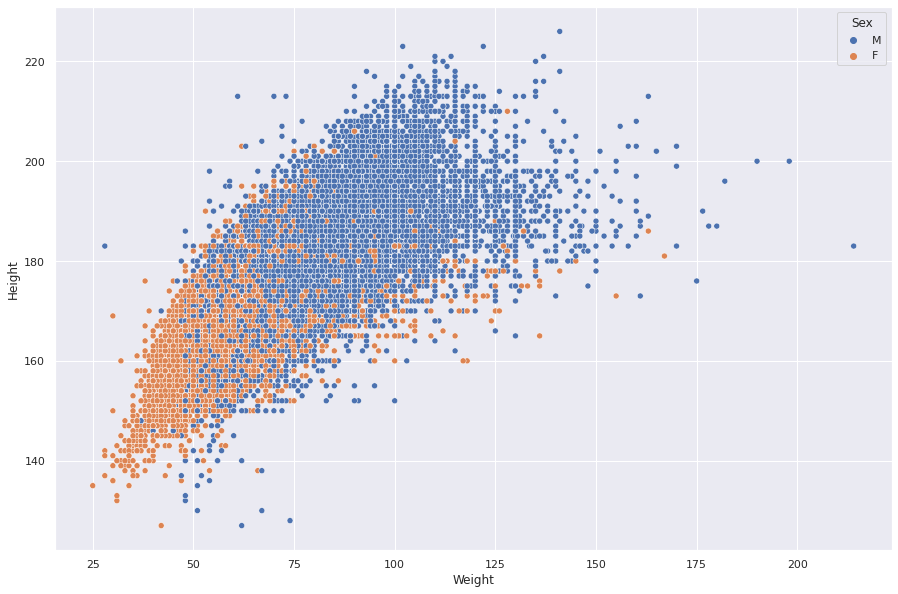

In [17]:
sns.set(rc={"figure.figsize":(15, 10)})
sns.scatterplot(data = df, x = 'Weight', y='Height', hue='Sex')

Li diem la columna de la qual crearà noves mostres segons la falta de mostres que hi hagi d'una classe 'Sex i les columnes les quals volem que ens ompli d'informació 'Weight', 'Height' i 'Age'.

In [18]:
smote = SMOTE(sampling_strategy='minority')
X_sm, Y_sm = smote.fit_resample(df[['Weight', 'Height', 'Age']], df[['Sex']])

La cel·la anterior ens generara dos dataframes, un per a la variable principal per a la que es basarà el resampling (Y_sm) i un altre per les altres variables que volem que ens generi informació (X_sm). Juntem els dos dataframes per poder graficarla.

In [19]:
dfSmote = X_sm.join(Y_sm)

Veim que efectivement s'han generat més mostres per a les noies 

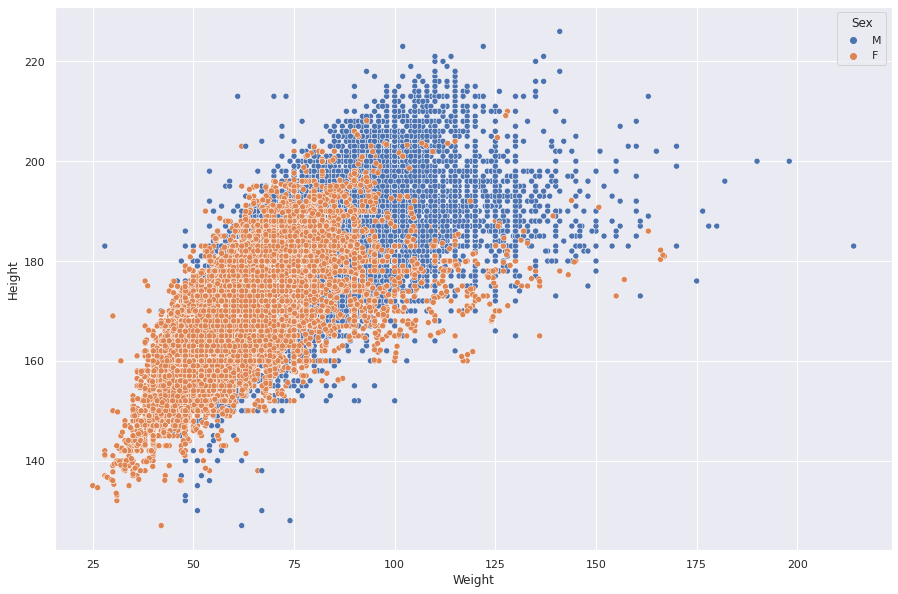

In [20]:
sns.set(rc={"figure.figsize":(15, 10)})
sns.scatterplot(data = dfSmote, x = 'Weight', y='Height', hue='Sex')

# Nivell 3
## Exercici 3
**Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling**

In [21]:
import random

In [22]:
def generator(max):
    number = 1
    while number < max:
        number += 1
        yield number

# Create as stream generator
stream = generator(df.shape[0])

# Doing Reservoir Sampling from the stream
k=1000
reservoir = []
for i, element in enumerate(stream):
    if i+1<= k:
        reservoir.append(element)
    else:
        probability = k/(i+1)
        if random.random() < probability:
            # Select item in stream and remove one of the k items already selected
             reservoir[random.choice(range(0,k))] = element
dfR = df.iloc[reservoir]

In [23]:
dfR

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport
143557,72057,Heinz Lucke,M,22.0,186.0,88.0,West Germany,1976,Summer,Montreal,Canoeing
192127,96466,Mira Potkonen,F,35.0,165.0,60.0,Finland,2016,Summer,Rio de Janeiro,Boxing
154960,77767,"Rodney Scott ""Rod"" McLain",M,23.0,190.0,64.0,United States,1984,Summer,Los Angeles,Canoeing
142599,71551,Jean-Luc Loret,M,24.0,173.0,73.0,France,1968,Summer,Mexico City,Shooting
143752,72162,"Luiz Carlos ""Luizo"" Bombonato Goulart",M,20.0,178.0,77.0,Brazil,1996,Summer,Atlanta,Football
...,...,...,...,...,...,...,...,...,...,...,...
48635,25066,Franoise Odette Damado,F,16.0,173.0,65.0,Senegal,1980,Summer,Moskva,Athletics
76243,38688,Ricardo Antonio Garca Rodrguez,M,24.0,177.0,75.0,Costa Rica,1980,Summer,Moskva,Football
167653,84230,Josef Nairz,M,27.0,184.0,95.0,Austria-1,1964,Winter,Innsbruck,Bobsleigh
15597,8395,Paulina Barzycka,F,18.0,181.0,67.0,Poland,2004,Summer,Athina,Swimming


In [24]:
df[df['Age']==68]

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport
225775,113447,Roberto Soundy,M,68.0,178.0,80.0,El Salvador,1968,Summer,Mexico City,Shooting
